In [51]:
#Check the version
R.version.string
getwd()

[1] "R version 3.6.3 (2020-02-29)"

[1] "C:/Users/user/Desktop/Workspaces/R/INAB/code"

In [52]:
# # Install packages
# install.packages('stringr')
# install.packages('glue')
# install.packages('purrr')
# # install.packages('tictoc')
# install.packages('plotly')

In [53]:
# Load libraries
library(stringr)
library(glue)
library(purrr)
# library(plotly)
# library(tictoc)

In [54]:
#Get the statistical results for a specific dataset and cutoff - [1]
table_cutoff_multiplicity<- function(data){
    
    wilcoxon <- matrix(, nrow = 3, ncol = 9, dimnames = list(c('Low-High', 'Low-Total', 'High-Total'), seq(100, 900, 100)))
    fisher <- matrix(, nrow = 3, ncol = 9, dimnames = list(c('Low-High', 'Low-Total', 'High-Total'), seq(100, 900, 100)))
    kolm_smirnov <- matrix(, nrow = 3, ncol = 9, dimnames = list(c('Low-High', 'Low-Total', 'High-Total'), seq(100, 900, 100)))
    
    #STATISTICAL TESTS [WILCOXON, FISHER, KOLMOGOROV-SMIRNOV]  

    for (cut in 1:9){
        
        low_mult <- data[data$Value < 100*cut, ]
        high_mult <- data[data$Value >= 100*cut, ]

        low = table(low_mult[, 2])
        high = table(high_mult[, 2])
        total = table(data[, 2])
    
        #Wilcoxon Test
        w1 = wilcox.test(low, high)$p.value
        w1[w1 >= 0.05] <- 1
        w1[w1 < 0.05] <- 0
        wilcoxon[1, cut] = as.integer(w1)
        
        w2 = wilcox.test(low, total)$p.value
        w2[w2 >= 0.05] <- 1
        w2[w2 < 0.05] <- 0
        wilcoxon[2, cut] = as.integer(w2)
        
        w3 = wilcox.test(high, total)$p.value
        w3[w3 >= 0.05] <- 1
        w3[w3 < 0.05] <- 0
        wilcoxon[3, cut] = as.integer(w3)

        #Fisher Test
        f1 = var.test(low, high)$p.value
        f1[f1 >= 0.05] <- 1
        f1[f1 < 0.05] <- 0
        fisher[1, cut] = as.integer(f1)
        
        f2 = var.test(low, total)$p.value
        f2[f2 >= 0.05] <- 1
        f2[f2 < 0.05] <- 0
        fisher[2, cut] = as.integer(f2)
        
        f3 = var.test(high, total)$p.value
        f3[f3 >= 0.05] <- 1
        f3[f3 < 0.05] <- 0
        fisher[3, cut] = as.integer(f3)

        #Kolmogorov-Smirnov
        k1 = ks.test(low, high)$p.value
        k1[k1 >= 0.05] <- 1
        k1[k1 < 0.05] <- 0
        kolm_smirnov[1, cut] = as.integer(k1)
        
        k2 = ks.test(low, total)$p.value
        k2[k2 >= 0.05] <- 1
        k2[k2 < 0.05] <- 0
        kolm_smirnov[2, cut] = as.integer(k2)
        
        k3 = ks.test(high, total)$p.value
        k3[k3 >= 0.05] <- 1
        k3[k3 < 0.05] <- 0
        kolm_smirnov[3, cut] = as.integer(k3)
        
#         #Shapiro
#         saphiro[1, cut] = .test(low, high)$p.value
#         saphiro[2, cut] = cor.test(low, total)$p.value
#         shapiro[3, cut] = cor.test(high, total)$p.value
        }

    return (list(wilcoxon, fisher, kolm_smirnov))
}

In [56]:
#Main - [1]
options(warn=-1)

#Choose k
k = 15

#Load data
data_path = file.path('C:','Users', 'user', 'Desktop', 'Workspaces', 'R', 'INAB', 'data', glue('sars_1000_info_k={k}.txt'))
data <- read.table(data_path)

#Filter data for 'ACTG'
filt_data <- data[str_detect(data[, 1], '^[ACTG]+$'),]

tbl = table_cutoff_multiplicity(filt_data)
tbl

#Save results
res_path = file.path('C:','Users', 'user', 'Desktop', 'Workspaces', 'R', 'INAB', 'results')
write.csv(tbl[1], glue('{res_path}/table_multiplicity_wilcox_k={k}'))
write.csv(tbl[2], glue('{res_path}/table_multiplicity_fisher_k={k}'))
write.csv(tbl[3], glue('{res_path}/table_multiplicity_kolm_k={k}'))

,100,200,300,400,500,600,700,800,900
Low-High,0,0,0,0,1,0,0,0,0
Low-Total,0,0,0,1,1,1,0,0,0
High-Total,1,1,1,1,1,1,0,0,0
,100,200,300,400,500,600,700,800,900
Low-High,0,0,0,0,0,0,1,1,0
Low-Total,0,0,0,0,0,1,1,1,1
High-Total,0,0,0,0,0,1,1,1,1
,100,200,300,400,500,600,700,800,900
Low-High,0,0,0,0,0,0,0,0,0
Low-Total,0,0,0,0,1,1,0,0,0


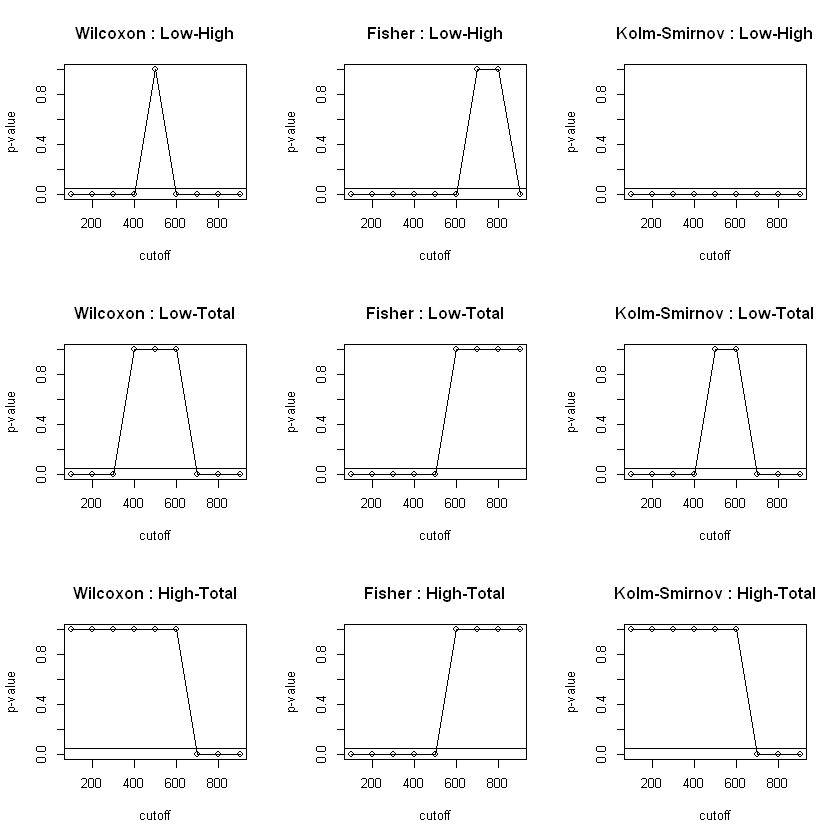

In [57]:
#Plots - ALL [1]
img_path = glue('{res_path}/img')
# png(glue('{img_path}/stats_multiplicity_k={k}.png'))
par(mfcol=c(3,3))


x_axis = 100*(1:9)
y_lim = c(0, 1)
# y_lim = NULL

#Wilcoxon
df_w = as.data.frame(tbl[1])

plot(x =  x_axis, y = unlist(df_w[1, ]), type = 'o', main = 'Wilcoxon : Low-High', xlab = 'cutoff', ylab = 'p-value', ylim = y_lim)
abline(h = 0.05)

plot(x =  x_axis, y = unlist(df_w[2, ]), type = 'o', main = 'Wilcoxon : Low-Total', xlab = 'cutoff', ylab = 'p-value', ylim = y_lim)
abline(h = 0.05)

plot(x =  x_axis, y = unlist(df_w[3, ]), type = 'o', main = 'Wilcoxon : High-Total', xlab = 'cutoff', ylab = 'p-value', ylim = y_lim)
abline(h = 0.05)

#Fisher
df_f = as.data.frame(tbl[2])

plot(x = x_axis, y = unlist(df_f[1, ]), type = 'o', main = 'Fisher : Low-High', xlab = 'cutoff', ylab = 'p-value', ylim = y_lim)
abline(h = 0.05)

plot(x = x_axis, y = unlist(df_f[2, ]), type = 'o', main = 'Fisher : Low-Total', xlab = 'cutoff', ylab = 'p-value', ylim = y_lim)
abline(h = 0.05)

plot(x = x_axis, y = unlist(df_f[3, ]), type = 'o', main = 'Fisher : High-Total', xlab = 'cutoff', ylab = 'p-value', ylim = y_lim)
abline(h = 0.05)

#Kolmogorov-Smirnov
df_k = as.data.frame(tbl[3])
plot(x = x_axis, y = unlist(df_k[1, ]), type = 'o', main = 'Kolm-Smirnov : Low-High', xlab = 'cutoff', ylab = 'p-value', ylim = y_lim)
abline(h = 0.05)

plot(x = x_axis, y = unlist(df_k[2, ]), type = 'o', main = 'Kolm-Smirnov : Low-Total', xlab = 'cutoff', ylab = 'p-value', ylim = y_lim)
abline(h = 0.05)

plot(x = x_axis, y = unlist(df_k[3, ]), type = 'o', main = 'Kolm-Smirnov : High-Total', xlab = 'cutoff', ylab = 'p-value', ylim = y_lim)
abline(h = 0.05)

# dev.off()